# Frequent Words Analysis

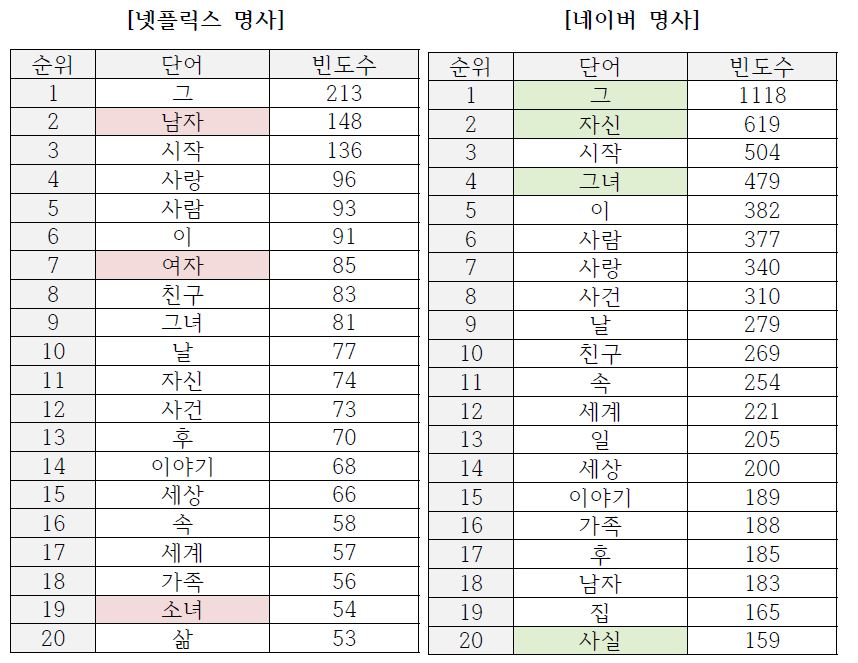

In [3]:
from IPython.display import Image
Image("noun_freq.jpg")

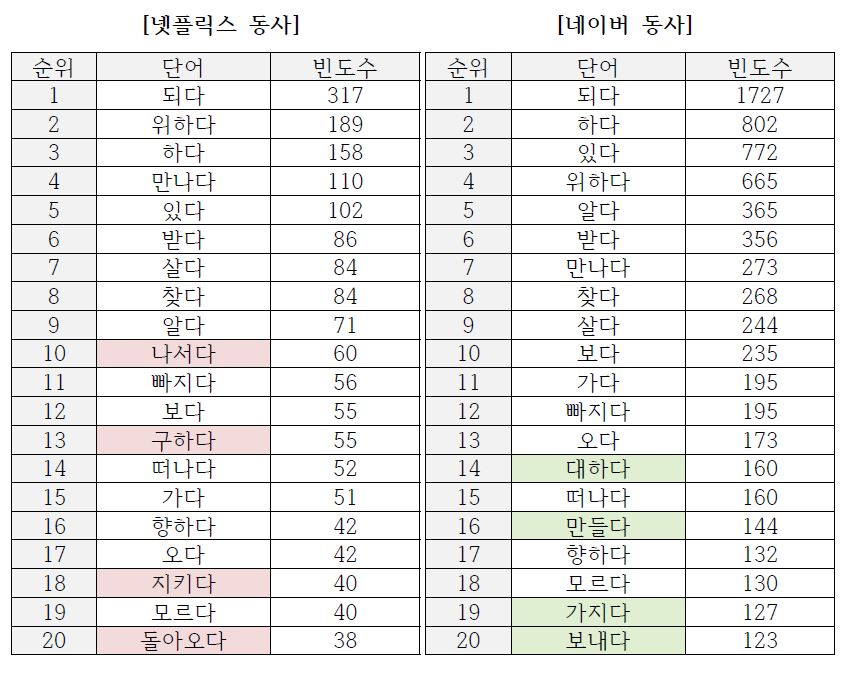

In [4]:
Image("verb_freq.jpg")

In [30]:
import pandas as pd
df = pd.read_csv('pos.csv')
df.head()

,title,desc,genre,media,len,sent_len,ECD,ECE,ECS,EFA,...,VCP,VV,VX,VXA,VXV,XPN,XR,XSA,XSN,XSV
0,아이 좀비,전도유망한 의과 레지던트가 어느 날 갑자기 좀비가 되어 생기는 이야기를 그린 드라마,드라마,naver,46,47.0,1.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Z 네이션,"좀비 바이러스가 세상을 휩쓸고 간 3년 후, 바이러스 백신을 만들 것이라는 유일한 ...",드라마,naver,88,88.0,1.0,1.0,0.0,0.0,...,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,4월은 너의 거짓말,엄마의 죽음으로 피아노를 칠 수 없게 된 천재 소년이 목표도 없이 지내던 중 친구의...,드라마,naver,80,80.0,2.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,와일드 알래스카,미국에서 가장 넓은 주인 알래스카의 울퉁불퉁한 해안에는 신기한 야생동물들이 서식하고...,드라마,naver,147,51.0,0.0,2.0,1.0,0.0,...,0.0,6.0,0.0,0.0,2.0,0.0,2.0,1.0,1.0,0.0
4,불야성,잠들지 않는 탐욕의 불빛들이 그 빛의 주인이 되기 위해 치열한 전쟁을 벌이는 과정을...,드라마,naver,54,54.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [31]:
df = df[['title', 'desc', 'media']]

In [32]:
df

,title,desc,media
0,아이 좀비,전도유망한 의과 레지던트가 어느 날 갑자기 좀비가 되어 생기는 이야기를 그린 드라마,naver
1,Z 네이션,"좀비 바이러스가 세상을 휩쓸고 간 3년 후, 바이러스 백신을 만들 것이라는 유일한 ...",naver
2,4월은 너의 거짓말,엄마의 죽음으로 피아노를 칠 수 없게 된 천재 소년이 목표도 없이 지내던 중 친구의...,naver
3,와일드 알래스카,미국에서 가장 넓은 주인 알래스카의 울퉁불퉁한 해안에는 신기한 야생동물들이 서식하고...,naver
4,불야성,잠들지 않는 탐욕의 불빛들이 그 빛의 주인이 되기 위해 치열한 전쟁을 벌이는 과정을...,naver
5,남자가 사랑할때,인생의 한 순간 뜨거운 열풍에 휩싸인 주인공들의 사랑을 그린 치정 멜로드라마,naver
6,호프 밸리,젊은 여교사가 서부의 작은 탄광촌에서 아이들을 가르치게 되면서 일어나는 이야기,naver
7,벡스트,엉뚱하고 게으르지만 남다른 재치가 있는 잭과 아름답고 똑똑하지만 허당 기질이 다분한...,naver
8,베르사유,루이 14세가 왕정 확립을 위해 파리에서 베르사유로 권력을 이동시키려 하며 벌어지는...,naver
9,터치,빚쟁이 실업자로 전락한 메이크업 아티스트와 아이돌 데뷔에 실패한 연습생이 만나 새로...,naver


In [33]:
naver = df.query('media=="naver"')
netflix = df.query('media=="netflix"')

In [34]:
naver

,title,desc,media
0,아이 좀비,전도유망한 의과 레지던트가 어느 날 갑자기 좀비가 되어 생기는 이야기를 그린 드라마,naver
1,Z 네이션,"좀비 바이러스가 세상을 휩쓸고 간 3년 후, 바이러스 백신을 만들 것이라는 유일한 ...",naver
2,4월은 너의 거짓말,엄마의 죽음으로 피아노를 칠 수 없게 된 천재 소년이 목표도 없이 지내던 중 친구의...,naver
3,와일드 알래스카,미국에서 가장 넓은 주인 알래스카의 울퉁불퉁한 해안에는 신기한 야생동물들이 서식하고...,naver
4,불야성,잠들지 않는 탐욕의 불빛들이 그 빛의 주인이 되기 위해 치열한 전쟁을 벌이는 과정을...,naver
5,남자가 사랑할때,인생의 한 순간 뜨거운 열풍에 휩싸인 주인공들의 사랑을 그린 치정 멜로드라마,naver
6,호프 밸리,젊은 여교사가 서부의 작은 탄광촌에서 아이들을 가르치게 되면서 일어나는 이야기,naver
7,벡스트,엉뚱하고 게으르지만 남다른 재치가 있는 잭과 아름답고 똑똑하지만 허당 기질이 다분한...,naver
8,베르사유,루이 14세가 왕정 확립을 위해 파리에서 베르사유로 권력을 이동시키려 하며 벌어지는...,naver
9,터치,빚쟁이 실업자로 전락한 메이크업 아티스트와 아이돌 데뷔에 실패한 연습생이 만나 새로...,naver


In [35]:
from konlpy.tag import Kkma
kkma = Kkma()
naver['pos'] = naver['desc'].apply(lambda x :kkma.pos(x))

c:\users\dudns_pk7j4bd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
netflix['pos'] = netflix['desc'].apply(lambda x: kkma.pos(x))

c:\users\dudns_pk7j4bd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
naver.iloc[1,0]

'Z 네이션'

In [55]:
def diff_analysis(string): # 특정 단어가 쓰인 네이버 시놉시스를 저장한 후, 같은 영화/드라마의 넷플릭스 시놉시스도 함께 저장
    df = pd.DataFrame(columns=['title', 'naver_desc'])
    count1=0
    for i in range(len(naver['pos'])):
        if string in str(naver.iloc[i,3]):
            title = naver.iloc[i,0]
            naver_desc = naver.iloc[i,1]
            df.loc[count1] = [title, naver_desc]
            count1+=1
        
    df2 = pd.DataFrame(columns=['title', 'netflix_desc'])
    count2=0
    for i in range(len(netflix)): 
        if netflix.iloc[i,0] in list(df['title']):
            title = netflix.iloc[i,0]
            netflix_desc = netflix.iloc[i,1]
            df2.loc[count2] = [title, netflix_desc]
            count2+=1
            
    return(pd.merge(df, df2))
    

In [61]:
# '집'이 사용된 네이버 시놉시스를 저장하고, 이에 저장된 영화/드라마의 넷플릭스 시놉시스도 저장 (표현 방식을 비교하기 위해)
home = diff_analysis("('집', 'NNG')") 

In [62]:
home.to_csv('home.csv', index=False, encoding='utf-8')

In [44]:
work = pd.DataFrame(columns=['title', 'naver_desc'])
count=0
for i in range(len(naver['pos'])):
    if "('일', 'NNG')" in str(naver.iloc[i,3]):
        title = naver.iloc[i,0]
        naver_desc = naver.iloc[i,1]
        work.loc[count] = [title, naver_desc]
        count+=1

In [45]:
netflix_work = pd.DataFrame(columns=['title', 'netflix_desc'])
count=0
for i in range(len(netflix)):
    if netflix.iloc[i,0] in list(work['title']):
        title = netflix.iloc[i,0]
        netflix_desc = netflix.iloc[i,1]
        netflix_work.loc[count] = [title, netflix_desc]
        count+=1

In [46]:
netflix_work

,title,netflix_desc
0,굿 와이프,스캔들로 철창신세가 된 정치인 남편 때문에 다시 변호사로 일하게 된 얼리샤 플로릭의...
1,미스터 션샤인,"1871년, 한 소년이 미국 군함을 타고 조선을 떠난다. 세월이 흐르고, 미군 장교..."
2,맨투맨,임무를 위해 보디가드로 위장한 비밀 요원 김설우. 국제적인 범죄에 맞서는 일도 벅찬...
3,감격시대,"전쟁으로 폐허가 된 1930년대를 배경으로 한국, 중국, 일본의 유력 조직폭력단 사..."
4,로맨스가 필요해 3,연애라면 지긋지긋한 32살 홈쇼핑 패션 MD 신주연. 자기도 모르는 사이에 두 명의...
5,로맨스가 필요해,헤어진 남자친구와의 관계를 정리하려 애쓰는 호텔 컨시어지 지배인 앞에 같은 호텔 상...
6,프레시 미트,여섯 명의 젊은이가 대학 생활이라는 인생에서 가장 흥미로운 여정을 시작하게 된다는 ...
7,총각네 야채 가게,"실제 창업 성공담에서 영감을 얻은 시리즈로, 채소 사업을 시작하는 야심 찬 젊은이와..."
8,신사의 품격,각자 나름대로 잘나가는 40대 꽃중년 4인방의 사랑과 성공 찾기를 담아낸 남성판 《...
9,침묵,실패를 모르는 남자. 돈이 진심이라 믿는 남자. 그러나 젊은 약혼녀가 주검으로 발견...


In [49]:
work = pd.merge(work, netflix_work)
work

,title,naver_desc,netflix_desc
0,굿 와이프,승승장구하던 검사 남편이 정치 스캔들과 부정부패로 구속되자 결혼 이후 일을 그만두었...,스캔들로 철창신세가 된 정치인 남편 때문에 다시 변호사로 일하게 된 얼리샤 플로릭의...
1,미스터 션샤인,신미양요(1871년) 때 군함에 승선해 미국에 떨어진 한 소년이 미국 군인 신분으로...,"1871년, 한 소년이 미국 군함을 타고 조선을 떠난다. 세월이 흐르고, 미군 장교..."
2,맨투맨,톱스타의 경호원이 되는 다재다능하고 미스터리한 남자에게 벌어지는 일을 그린 드라마,임무를 위해 보디가드로 위장한 비밀 요원 김설우. 국제적인 범죄에 맞서는 일도 벅찬...
3,감격시대,1930년대 중국 상하이 및 국내를 배경으로 한.중.일 낭만주먹들이 펼쳐내는 사랑과...,"전쟁으로 폐허가 된 1930년대를 배경으로 한국, 중국, 일본의 유력 조직폭력단 사..."
4,로맨스가 필요해 3,"연애와 일, 사랑과 성공. 두 가지 모두를 쟁취하기 위해 고군분투하는 30대 여자들...",연애라면 지긋지긋한 32살 홈쇼핑 패션 MD 신주연. 자기도 모르는 사이에 두 명의...
5,로맨스가 필요해,"연애와 일, 사랑과 성공. 두 가지 모두를 쟁취하기 위해 고군분투하는 30대 여자들...",헤어진 남자친구와의 관계를 정리하려 애쓰는 호텔 컨시어지 지배인 앞에 같은 호텔 상...
6,프레시 미트,대학교 신입생들이 한 공간에 모여 살면서 일어나는 일들을 그린 드라마,여섯 명의 젊은이가 대학 생활이라는 인생에서 가장 흥미로운 여정을 시작하게 된다는 ...
7,총각네 야채 가게,자신의 일에 최선을 다해 노력하는 건강한 젊은이들의 일과 꿈 그리고 사랑을 다룬 드라마,"실제 창업 성공담에서 영감을 얻은 시리즈로, 채소 사업을 시작하는 야심 찬 젊은이와..."
8,신사의 품격,"사랑과 이별, 성공과 좌절을 경험하고 세상 어떤 일에도 미혹되지 않는 불혹을 넘긴 ...",각자 나름대로 잘나가는 40대 꽃중년 4인방의 사랑과 성공 찾기를 담아낸 남성판 《...
9,침묵,"재력과 사랑, 세상을 다 가진 남자 ‘임태산’(최민식) 모든 것이 완벽히 행복하다 ...",실패를 모르는 남자. 돈이 진심이라 믿는 남자. 그러나 젊은 약혼녀가 주검으로 발견...


In [47]:
work

,title,naver_desc
0,굿 와이프,승승장구하던 검사 남편이 정치 스캔들과 부정부패로 구속되자 결혼 이후 일을 그만두었...
1,미스터 션샤인,신미양요(1871년) 때 군함에 승선해 미국에 떨어진 한 소년이 미국 군인 신분으로...
2,맨투맨,톱스타의 경호원이 되는 다재다능하고 미스터리한 남자에게 벌어지는 일을 그린 드라마
3,감격시대,1930년대 중국 상하이 및 국내를 배경으로 한.중.일 낭만주먹들이 펼쳐내는 사랑과...
4,로맨스가 필요해 3,"연애와 일, 사랑과 성공. 두 가지 모두를 쟁취하기 위해 고군분투하는 30대 여자들..."
5,로맨스가 필요해,"연애와 일, 사랑과 성공. 두 가지 모두를 쟁취하기 위해 고군분투하는 30대 여자들..."
6,프레시 미트,대학교 신입생들이 한 공간에 모여 살면서 일어나는 일들을 그린 드라마
7,총각네 야채 가게,자신의 일에 최선을 다해 노력하는 건강한 젊은이들의 일과 꿈 그리고 사랑을 다룬 드라마
8,신사의 품격,"사랑과 이별, 성공과 좌절을 경험하고 세상 어떤 일에도 미혹되지 않는 불혹을 넘긴 ..."
9,침묵,"재력과 사랑, 세상을 다 가진 남자 ‘임태산’(최민식) 모든 것이 완벽히 행복하다 ..."


In [50]:
work.to_csv('work.csv', index=False, encoding='utf-8')

In [8]:
naver.to_csv('naver_pos.csv', index=False, encoding='utf-8')

In [10]:
netflix.to_csv('netflix_pos.csv', index=False, encoding='utf-8')

In [2]:
import pandas as pd
naver = pd.read_csv('naver_pos.csv')
netflix = pd.read_csv('naver_pos.csv')

In [12]:
home = pd.DataFrame(columns=['title', 'naver_desc'])
count=0
for i in range(len(naver['pos'])):
    if '(집, NNG)' in naver.iloc[i,3]:
        title = naver.iloc[i,0]
        naver_desc = naver.iloc[i,1]
        home[count] = [title, naver_desc]
        count+=1

In [13]:
for i in range(len(netflix['pos'])):
    if netflix.iloc[i,0] in list(home['title']):
        home['netflix_desc'] = netflix.iloc[i,1]        

In [ ]:
home = pd.DataFrame(columns=['title', 'naver_desc'])
count=0
for i in range(len(naver['pos'])):
    if '(집, NNG)' in naver.iloc[i,3]:
        title = naver.iloc[i,0]
        naver_desc = naver.iloc[i,1]
        home[count] = [title, naver_desc]
        count+=1

In [ ]:
for i in range(len(netflix['pos'])):
    if netflix.iloc[i,0] in list(home['title']):
        home['netflix_desc'] = netflix.iloc[i,1]  

In [18]:
from collections import Counter

In [9]:
naver_fact3 = pd.DataFrame(columns=['1','2', '3']) # 네이버 :'사실' 앞의 3가지 형태소 
count=0
for i in range(len(naver)):
    for j in range(len(naver.iloc[i,3])):
        if naver.iloc[i,3][j]== ('사실', 'NNG'):
            naver_fact3.loc[count] = [naver.iloc[i,3][j-3], naver.iloc[i,3][j-2],naver.iloc[i,3][j-1]]
            count+=1

In [24]:
Counter(netflix_fact3['3']).most_common()

[(('다는', 'ETD'), 5),
 (('라는', 'ETD'), 4),
 (('ㄴ', 'ETD'), 4),
 (('ㄴ다는', 'ETD'), 3),
 (('는다는', 'ETD'), 2),
 (('은', 'ETD'), 1),
 (('도', 'JX'), 1),
 ((',', 'SP'), 1),
 (('란', 'ETD'), 1),
 (('이', 'JKS'), 1),
 (('충격적', 'NNG'), 1),
 (('이', 'MDT'), 1),
 (('외도', 'NNG'), 1),
 (('가', 'JKS'), 1),
 (('?', 'SF'), 1)]

In [23]:
Counter(naver_fact3['3']).most_common()

[(('다는', 'ETD'), 39),
 (('ㄴ', 'ETD'), 24),
 (('라는', 'ETD'), 17),
 (('ㄴ다는', 'ETD'), 12),
 (('그', 'MDT'), 6),
 (('이', 'MDT'), 6),
 (('이', 'JKS'), 5),
 (('는', 'ETD'), 5),
 (('란', 'ETD'), 5),
 (('모든', 'MDT'), 4),
 (('임신', 'NNG'), 3),
 (('.', 'SF'), 3),
 (('외도', 'NNG'), 2),
 (('범죄', 'NNG'), 2),
 (('충격적', 'NNG'), 2),
 (('과학적', 'NNG'), 1),
 (('폐교', 'NNG'), 1),
 (('침투', 'NNG'), 1),
 (('하나', 'NNG'), 1),
 (('유괴', 'NNG'), 1),
 (('아', 'ECS'), 1),
 (('극비', 'NNG'), 1),
 (('제발', 'MAG'), 1),
 (('사망', 'NNG'), 1),
 (('은', 'ETD'), 1),
 (('범행', 'NNG'), 1),
 (('나', 'NNG'), 1),
 (('내진', 'NNG'), 1),
 (('하지만', 'MAC'), 1),
 (('지만', 'ECE'), 1),
 (('는', 'JX'), 1),
 (('침공', 'NNG'), 1),
 (('생존', 'NNG'), 1),
 (('가', 'JKS'), 1),
 (('은', 'NNG'), 1),
 (('“', 'SS'), 1),
 ((',', 'SP'), 1),
 (('단', 'ETD'), 1),
 (('에게', 'JKM'), 1)]

In [112]:
Counter(naver_fact)

Counter({'NNG': 22,
         'ETD': 104,
         'JKS': 6,
         'MDT': 16,
         'ECS': 1,
         'SF': 3,
         'MAG': 1,
         'MAC': 1,
         'ECE': 1,
         'JX': 1,
         'SS': 1,
         'SP': 1,
         'JKM': 1})

In [11]:
netflix_fact3 = pd.DataFrame(columns=['1','2', '3']) # 넷플릭스 : '사실' 앞의 3가지 형태소
count=0
for i in range(len(netflix)):
    for j in range(len(netflix.iloc[i,3])):
        if netflix.iloc[i,3][j]== ('사실', 'NNG'):
            netflix_fact3.loc[count] = [netflix.iloc[i,3][j-3], netflix.iloc[i,3][j-2],netflix.iloc[i,3][j-1]]
            count+=1

In [12]:
netflix_fact3

,1,2,3
0,"(도, JX)","(좋아하, VV)","(ㄴ다는, ETD)"
1,"(라, ECD)","(믿, VV)","(은, ETD)"
2,"(친구, NNG)","(아드리앙, UN)","(도, JX)"
3,"(', SS)","(이, VCP)","(라는, ETD)"
4,"(하, XSV)","(어도, ECD)","(,, SP)"
5,"(에, JKM)","(놀랍, VA)","(ㄴ, ETD)"
6,"(지, ECD)","(않, VXV)","(는다는, ETD)"
7,"(출장, NNG)","(이, VCP)","(란, ETD)"
8,"(면서, ECE)","(엄청나, VA)","(ㄴ, ETD)"
9,"(어야, ECD)","(하, VV)","(ㄴ다는, ETD)"


In [114]:
Counter(netflix_fact)

Counter({'ETD': 20, 'JX': 1, 'SP': 1, 'JKS': 2, 'NNG': 2, 'MDT': 1, 'SF': 1})

In [128]:
nav_work=[]
for i in range(len(naver)):
    for j in range(len(naver.iloc[i,3])):
        if naver.iloc[i,3][j]== ('일', 'NNG'):
            print(naver.iloc[i,3][j-3],naver.iloc[i,3][j-2],naver.iloc[i,3][j-1])

In [24]:
net_work=[]
for i in range(len(netflix)):
    for j in range(len(netflix.iloc[i,3])):
        if netflix.iloc[i,3][j]== ('일', 'NNG'):
            net_work.append(netflix.iloc[i,3][j-1][1])

In [25]:
len(net_work)

0

In [120]:
len(nav_work)

214

In [129]:
Counter(nav_work)

Counter({('이후', 'NNG'): 1,
         ('는', 'ETD'): 42,
         ('.', 'SF'): 1,
         ('와', 'JKM'): 2,
         ('의', 'JKG'): 7,
         ('어떤', 'MDT'): 3,
         ('ㄴ', 'ETD'): 44,
         ('배달', 'NNG'): 1,
         (',', 'SP'): 3,
         ('과연', 'MAG'): 1,
         ('무슨', 'MDT'): 12,
         ('게', 'ECD'): 3,
         ('이런', 'MDT'): 2,
         ('은', 'JX'): 1,
         ('대로', 'JX'): 1,
         (':', 'SP'): 1,
         ('남의', 'NNG'): 1,
         ('가족', 'NNG'): 1,
         ('묵묵히', 'MAG'): 1,
         ('백동', 'NNG'): 6,
         ('자', 'ECE'): 1,
         ('미라', 'NNG'): 1,
         ('도록', 'ECD'): 1,
         ('?', 'SF'): 1,
         ('가지', 'NNB'): 1,
         ('함께', 'MAG'): 1,
         ('그간', 'NNG'): 1,
         ('성동', 'NNP'): 1,
         ('다는', 'ETD'): 1,
         ('ㄹ라', 'ECD'): 1,
         ('아무', 'MDT'): 3,
         ('회사', 'NNG'): 1,
         ('결국', 'NNG'): 1,
         ('비서', 'NNG'): 1,
         ('\xa0', 'SW'): 4,
         ('해결사', 'NNG'): 1,
         ('친목회', 'NNG'): 1,
         ('

In [127]:
Counter(net_work)

Counter({'NNG': 5,
         'JKM': 3,
         'ETD': 23,
         'MDT': 6,
         'SF': 4,
         'ECE': 2,
         'MAG': 2,
         'JKS': 1,
         'JKG': 1,
         'NP': 1,
         'MDN': 1,
         'ECD': 1})

In [20]:
naver.iloc[1,3]

"[('좀비', 'NNG'), ('바이러스', 'NNG'), ('가', 'JKS'), ('세상', 'NNG'), ('을', 'JKO'), ('휩쓸', 'VV'), ('고', 'ECE'), ('간', 'NNG'), ('3', 'NR'), ('년', 'NNM'), ('후', 'NNG'), (',', 'SP'), ('바이러스', 'NNG'), ('백신', 'NNG'), ('을', 'JKO'), ('만들', 'VV'), ('ㄹ', 'ETD'), ('것', 'NNB'), ('이', 'VCP'), ('라는', 'ETD'), ('유일', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('희망', 'NNG'), ('으로', 'JKM'), ('죽음', 'NNG'), ('과', 'JC'), ('공포', 'NNG'), ('의', 'JKG'), ('여정', 'NNG'), ('에', 'JKM'), ('오르', 'VV'), ('ㄴ', 'ETD'), ('사람', 'NNG'), ('들', 'XSN'), ('의', 'JKG'), ('이야기', 'NNG'), ('를', 'JKO'), ('그리', 'VV'), ('ㄴ', 'ETD'), ('액션', 'NNG'), ('호', 'VV'), ('러', 'ECD'), ('드라마', 'NNG')]"

In [1]:
import pandas as pd 
naver = pd.read_csv('naver_pos.csv')

In [19]:
list1=[]
for i in range(len(naver)):
    for j in range(len(naver.iloc[i,3])):
        if naver.iloc[i,3][j]== ('사실', 'NNG'):
            list1.append(naver.iloc[i,3][j-2],naver.iloc[i,3][j-1])

In [21]:
list1

[]

In [23]:
netflix = pd.read_csv('netflix_pos.csv')

In [14]:
naver_home2 = pd.DataFrame(columns=['앞', '뒤']) # 네이버 : '집' 앞, 뒤에 있는 형태소 확인
count=0
for i in range(len(naver)):
    for j in range(len(naver.iloc[i,3])):
        if naver.iloc[i,3][j]== ('집', 'NNG'):
            naver_home2.loc[count] = [naver.iloc[i,3][j-1], naver.iloc[i,3][j+1]]
            count+=1

In [19]:
Counter(list(naver_home2['뒤']))

Counter({('으로', 'JKM'): 43,
         ('블', 'VV'): 1,
         ('에서', 'JKM'): 17,
         ('?', 'SF'): 1,
         ('까지', 'JX'): 3,
         ('과', 'JKM'): 1,
         ('에', 'JKM'): 32,
         ('보다', 'JKM'): 1,
         ('을', 'JKO'): 26,
         ('두', 'MDN'): 1,
         ('떠나', 'VV'): 1,
         ('앞', 'NNG'): 5,
         ('과', 'JC'): 1,
         (',', 'SP'): 3,
         ("'", 'SS'): 1,
         ('밖', 'NNG'): 1,
         ('은', 'JX'): 2,
         ('의', 'JKG'): 4,
         ('딸', 'NNG'): 1,
         ('장남', 'NNG'): 1,
         ('근처', 'NNG'): 3,
         ('사일', 'NNG'): 1,
         ('만', 'JX'): 1,
         ('잃', 'VV'): 1,
         ('바로', 'MAG'): 1,
         ('인테리어', 'NNG'): 1,
         ('다락', 'NNG'): 1,
         ('들', 'XSN'): 1,
         ('…', 'SE'): 1,
         ('수리', 'NNG'): 1,
         ('조차', 'JX'): 1,
         ('한', 'MDN'): 1,
         ('처럼', 'JKM'): 1,
         ('이웃', 'NNG'): 1,
         ('이', 'VCP'): 1})

In [20]:
Counter(list(netflix_home2['뒤']))

Counter({('으로', 'JKM'): 8,
         ('에서', 'JKM'): 5,
         ('?', 'SF'): 1,
         ('의', 'JKG'): 1,
         ('없', 'VA'): 1,
         ('요함', 'NNG'): 1,
         ('에', 'JKM'): 6,
         ('을', 'JKO'): 3,
         ('안', 'NNG'): 1,
         ('.', 'SF'): 2,
         ('은', 'JX'): 2,
         ('!', 'SF'): 1,
         ('주위', 'NNG'): 1,
         ('이', 'VCP'): 1,
         ('냉장고', 'NNG'): 1})

In [16]:
netflix_home2 = pd.DataFrame(columns=['앞', '뒤']) # 넷플릭스: '집' 앞 뒤에 오는 형태소 확인
count=0
for i in range(len(netflix)):
    for j in range(len(netflix.iloc[i,3])):
        if netflix.iloc[i,3][j]== ('집', 'NNG'):
            netflix_home2.loc[count] = [netflix.iloc[i,3][j-1], netflix.iloc[i,3][j+1]]
            count+=1

In [17]:
netflix_home2

,앞,뒤
0,"(., SF)","(으로, JKM)"
1,"(ㄴ, ETD)","(에서, JKM)"
2,"(는, JX)","(으로, JKM)"
3,"(러, ECD)","(으로, JKM)"
4,"(의, JKG)","(?, SF)"
5,"(게, ECD)","(으로, JKM)"
6,"(그, MDT)","(의, JKG)"
7,"(ㄴ, ETD)","(없, VA)"
8,"(이제, MAG)","(으로, JKM)"
9,"(의, JKG)","(요함, NNG)"


In [37]:
def diff_analysis2(string): # 특정 단어가 쓰인 넷플릭스 시놉시스를 저장한 후, 같은 영화/드라마의 네이버 시놉시스도 함께 저장
    
    df = pd.DataFrame(columns=['title', 'netflix_desc'])
    count1=0
    for i in range(len(netflix['pos'])):
        if string in str(netflix.iloc[i,3]):
            title = netflix.iloc[i,0]
            netflix_desc = netflix.iloc[i,1]
            df.loc[count1] = [title, netflix_desc]
            count1+=1
        
    df2 = pd.DataFrame(columns=['title', 'naver_desc'])
    count2=0
    for i in range(len(naver)): 
        if naver.iloc[i,0] in list(df['title']):
            title = naver.iloc[i,0]
            naver_desc = naver.iloc[i,1]
            df2.loc[count2] = [title, naver_desc]
            count2+=1
            
    return(pd.merge(df, df2))

In [29]:
netflix.iloc[1,3]

[('치명적', 'NNG'),
 ('이', 'VCP'),
 ('ㄴ', 'ETD'),
 ('좀비', 'NNG'),
 ('바이러스', 'NNG'),
 ('에서', 'JKM'),
 ('살아남', 'VV'),
 ('은', 'ETD'),
 ('남자', 'NNG'),
 ('가', 'JKS'),
 ('백신', 'NNG'),
 ('에', 'JKM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('키', 'NNG'),
 ('를', 'JKO'),
 ('쥐', 'VV'),
 ('고', 'ECE'),
 ('있', 'VXV'),
 ('다고', 'EFN'),
 ('믿', 'VV'),
 ('고', 'ECE'),
 (',', 'SP'),
 ('그', 'NP'),
 ('들', 'XSN'),
 ('은', 'JX'),
 ('위험천만', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('미국', 'NNP'),
 ('횡단', 'NNG'),
 ('에', 'JKM'),
 ('도전', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [30]:
#'나서다'가 들어있는 넷플릭스 시놉시스 저장, 이에 저장된 영화/드라마의 네이버 시놉시스도 저장
verb1 = diff_analysis2("('나서', 'VV')") 

In [34]:
verb1.to_csv('verb1.csv', index=False, encoding='utf-8')

In [35]:
verb2 = diff_analysis2("('구하', 'VV')")

In [36]:
verb2.to_csv('verb2.csv', index=False, encoding='utf-8')

In [37]:
verb3 = diff_analysis2("('돌아오', 'VV')")
verb4 = diff_analysis("('가지', 'VV')")

In [38]:
verb3.to_csv('verb3.csv', index=False, encoding='utf-8')
verb4.to_csv('verb4.csv', index=False, encoding='utf-8')

In [39]:
verb5 = diff_analysis("('보내', 'VV')")

In [40]:
verb5.to_csv('verb5.csv', index=False, encoding='utf-8')

In [42]:
work = diff_analysis("('일', 'NNG')")

In [58]:
self = diff_analysis("('자신', 'NNG')")

In [38]:
life = diff_analysis2("('삶', 'NNG')")

In [39]:
life.to_csv('life.csv', index=False, encoding='utf-8')

In [52]:
save = diff_analysis2("('지키', 'VV')")
save.to_csv('save.csv', index=False, encoding='utf-8')

In [56]:
treat = diff_analysis("('대하', 'VV')")
treat.to_csv('treat.csv', index=False, encoding='utf-8')

In [58]:
make = diff_analysis("('만들', 'VV')")
make.to_csv('make.csv', index=False, encoding='utf-8')

In [59]:
self

,title,naver_desc,netflix_desc
0,굿 와이프,승승장구하던 검사 남편이 정치 스캔들과 부정부패로 구속되자 결혼 이후 일을 그만두었...,스캔들로 철창신세가 된 정치인 남편 때문에 다시 변호사로 일하게 된 얼리샤 플로릭의...
1,밀회,성공을 위해 앞만 바라보고 달려온 예술재단 기획실장 오혜원과 자신의 재능을 모르고 ...,선재가 폭행 혐의로 철창신세를 질 처지에 놓이자 다미가 혜원에게 도움을 청한다.
2,미스터 션샤인,신미양요(1871년) 때 군함에 승선해 미국에 떨어진 한 소년이 미국 군인 신분으로...,"1871년, 한 소년이 미국 군함을 타고 조선을 떠난다. 세월이 흐르고, 미군 장교..."
3,강철의 연금술사,연금술사인 에드와 알 형제는 어머니를 되살리기 위하여 ‘인체 연성’을 시도했다가 참...,죽은 어머니를 되살리려 금단의 연금술을 시도했다가 신체를 빼앗긴 알폰스와 에드워드 ...
4,총각네 야채 가게,자신의 일에 최선을 다해 노력하는 건강한 젊은이들의 일과 꿈 그리고 사랑을 다룬 드라마,"실제 창업 성공담에서 영감을 얻은 시리즈로, 채소 사업을 시작하는 야심 찬 젊은이와..."
5,다섯 손가락,천재 피아니스트들의 사랑과 악기를 만드는 그룹의 후계자를 놓고 벌이는 암투 및 복수...,채영랑은 피아니스트로서의 성공을 포기한 채 현모양처의 삶을 꿈꾸며 재벌과 결혼한다....
6,어비스,"""영혼 소생 구슬"" 어비스를 통해 생전과 180도 다른 '반전 비주얼'로 부활한 두...",서로 다른 사고로 이른 나이에 죽은 두 남녀. 그런데 두 사람이 완전히 달라진 외모...
7,침묵,"재력과 사랑, 세상을 다 가진 남자 ‘임태산’(최민식) 모든 것이 완벽히 행복하다 ...",실패를 모르는 남자. 돈이 진심이라 믿는 남자. 그러나 젊은 약혼녀가 주검으로 발견...
8,채비,일곱살 같은 서른살 아들 인규를 24시간 특별 케어(?) 하느라 어느 새 30년 프...,지적 장애 아들을 둔 노모. 병에 걸려 살날이 얼마 남지 않아 걱정이 태산이다. 자...
9,메리 크리스마스 미스터 모,어느 날 예고 없이 쿵! 암 선고를 받게 된 미스터 모. 생의 마지막 카운트다운이 ...,인생이 비극이라 해도 영화만큼은 희극으로! 갑작스럽게 위암을 선고받은 이발사. 젊은...


In [60]:
self.to_csv('self.csv', index=False, encoding='utf-8')

In [63]:
woman = diff_analysis2("('여자', 'NNG')")

In [64]:
woman.to_csv('woman.csv', index=False, encoding='utf-8')

In [53]:
work_list=[] # 네이버 : '일' 앞에 쓴 형태소 확인
for i in range(len(naver)):
    for j in range(len(naver.iloc[i,3])):
        if naver.iloc[i,3][j]== ('일', 'NNG'):
            work_list.append(naver.iloc[i,3][j-1])

In [54]:
Counter(work_list).most_common()

[(('ㄴ', 'ETD'), 44),
 (('는', 'ETD'), 42),
 (('무슨', 'MDT'), 12),
 (('카', 'NNG'), 10),
 (('의', 'JKG'), 7),
 (('백동', 'NNG'), 6),
 (('은', 'ETD'), 6),
 (('\xa0', 'SW'), 4),
 (('ㄹ', 'ETD'), 4),
 (('어떤', 'MDT'), 3),
 ((',', 'SP'), 3),
 (('게', 'ECD'), 3),
 (('아무', 'MDT'), 3),
 (('그', 'MDT'), 3),
 (('왠', 'MDT'), 3),
 (('와', 'JKM'), 2),
 (('이런', 'MDT'), 2),
 (('...', 'SE'), 2),
 (('모든', 'MDT'), 2),
 (('어', 'ECS'), 2),
 (('이', 'MDT'), 2),
 (('에서', 'JKM'), 2),
 (('사냥', 'NNG'), 2),
 (('이후', 'NNG'), 1),
 (('.', 'SF'), 1),
 (('배달', 'NNG'), 1),
 (('과연', 'MAG'), 1),
 (('은', 'JX'), 1),
 (('대로', 'JX'), 1),
 ((':', 'SP'), 1),
 (('남의', 'NNG'), 1),
 (('가족', 'NNG'), 1),
 (('묵묵히', 'MAG'), 1),
 (('자', 'ECE'), 1),
 (('미라', 'NNG'), 1),
 (('도록', 'ECD'), 1),
 (('?', 'SF'), 1),
 (('가지', 'NNB'), 1),
 (('함께', 'MAG'), 1),
 (('그간', 'NNG'), 1),
 (('성동', 'NNP'), 1),
 (('다는', 'ETD'), 1),
 (('ㄹ라', 'ECD'), 1),
 (('회사', 'NNG'), 1),
 (('결국', 'NNG'), 1),
 (('비서', 'NNG'), 1),
 (('해결사', 'NNG'), 1),
 (('친목회', 'NNG'), 1),
 (('션스',

In [45]:
work_list_net=[] #  넷플릭스: '일' 앞에 쓴 형태소 확인
for i in range(len(netflix)):
    for j in range(len(netflix.iloc[i,3])):
        if netflix.iloc[i,3][j]== ('일', 'NNG'):
            work_list_net.append(netflix.iloc[i,3][j-1])

In [48]:
Counter(work_list_net).most_common()

[('ETD', 23),
 ('MDT', 6),
 ('NNG', 5),
 ('SF', 4),
 ('JKM', 3),
 ('ECE', 2),
 ('MAG', 2),
 ('JKS', 1),
 ('JKG', 1),
 ('NP', 1),
 ('MDN', 1),
 ('ECD', 1)]

In [7]:
from konlpy.tag import Kkma
kkma = Kkma()

#### 피동 표현
1. ('어', 'ECS'),('지', 'VXV'),
2. ('게', 'ECD'), ('되', 'VV'),

In [11]:
str(netflix.iloc[1,3])

"[('좀비', 'NNG'), ('바이러스', 'NNG'), ('가', 'JKS'), ('세상', 'NNG'), ('을', 'JKO'), ('휩쓸', 'VV'), ('고', 'ECE'), ('간', 'NNG'), ('3', 'NR'), ('년', 'NNM'), ('후', 'NNG'), (',', 'SP'), ('바이러스', 'NNG'), ('백신', 'NNG'), ('을', 'JKO'), ('만들', 'VV'), ('ㄹ', 'ETD'), ('것', 'NNB'), ('이', 'VCP'), ('라는', 'ETD'), ('유일', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('희망', 'NNG'), ('으로', 'JKM'), ('죽음', 'NNG'), ('과', 'JC'), ('공포', 'NNG'), ('의', 'JKG'), ('여정', 'NNG'), ('에', 'JKM'), ('오르', 'VV'), ('ㄴ', 'ETD'), ('사람', 'NNG'), ('들', 'XSN'), ('의', 'JKG'), ('이야기', 'NNG'), ('를', 'JKO'), ('그리', 'VV'), ('ㄴ', 'ETD'), ('액션', 'NNG'), ('호', 'VV'), ('러', 'ECD'), ('드라마', 'NNG')]"

In [41]:
naver.head()

,title,desc,media,pos
0,아이 좀비,전도유망한 의과 레지던트가 어느 날 갑자기 좀비가 되어 생기는 이야기를 그린 드라마,naver,"[(전도, NNG), (유망, NNG), (하, XSV), (ㄴ, ETD), (의과..."
1,Z 네이션,"좀비 바이러스가 세상을 휩쓸고 간 3년 후, 바이러스 백신을 만들 것이라는 유일한 ...",naver,"[(좀비, NNG), (바이러스, NNG), (가, JKS), (세상, NNG), ..."
2,4월은 너의 거짓말,엄마의 죽음으로 피아노를 칠 수 없게 된 천재 소년이 목표도 없이 지내던 중 친구의...,naver,"[(엄마, NNG), (의, JKG), (죽음, NNG), (으로, JKM), (피..."
3,와일드 알래스카,미국에서 가장 넓은 주인 알래스카의 울퉁불퉁한 해안에는 신기한 야생동물들이 서식하고...,naver,"[(미국, NNP), (에서, JKM), (가장, MAG), (넓, VA), (은,..."
4,불야성,잠들지 않는 탐욕의 불빛들이 그 빛의 주인이 되기 위해 치열한 전쟁을 벌이는 과정을...,naver,"[(잠들, VV), (ㄹ지, ECD), (않, VXV), (는, ETD), (탐욕,..."


In [118]:
net_passive2 = pd.DataFrame(columns=['title', 'netflix_desc']) # 넷플릭스에서 피동 표현이 사용된 경우 
count1=0
for i in range(len(netflix['pos'])):
    if "('게', 'ECD'), ('되', 'VV')" in str(netflix.iloc[i,3]):
        title = netflix.iloc[i,0]
        netflix_desc = netflix.iloc[i,1]
        net_passive2.loc[count1] = [title, netflix_desc]
        count1+=1

In [119]:
net_passive2

,title,netflix_desc
0,더 패키지,낯선 이들이 만나 환상과 환장 사이를 경험하는 패키지여행. 그렇게 한 무리의 프랑스...
1,굿 와이프,스캔들로 철창신세가 된 정치인 남편 때문에 다시 변호사로 일하게 된 얼리샤 플로릭의...
2,플래시,혼수상태에서 깨어난 후 놀라운 능력을 갖게 된 과학수사 전문가가 도시를 위협하는 세...
3,알바뛰는 마왕님,엔테 이슬라를 정복하려는 시도가 좌절된 후 오늘날의 도쿄에 떨어진 사탄과 대원수 알...
4,성균관 스캔들,조선 시대의 한 소녀 가장은 대리시험 일을 맡았다가 남자만 입학할 수 있는 성균관에...
5,스타트렉: 보이저,75년에 걸친 보이저호의 지구 귀환 여정에서 선원들은 의문의 우주 분면에 가까이 다...
6,달의 연인 - 보보경심 려,"1,000년을 거슬러 고려 시대로 시간 여행을 하게 된 21세기 여인. 궁중의 암투..."
7,응답하라 1997,유정이 젝스키스도 좋아한다는 사실을 알게 된 시원. 배신감을 느낀 나머지 유정과 말...
8,응답하라 1994,대학 농구경기를 보고 온 나정은 허리가 아파서 꼼짝도 못한다. 처음으로 미팅에 나가...
9,파라다이스 목장,10대 시절 이혼한 젊은 수의사와 부유한 상속자는 6년이 지난 후 아름다운 섬 제주...


In [116]:
net_passive3 = pd.DataFrame(columns=['title', 'netflix_desc'])
count1=0
for i in range(len(netflix['pos'])):
    if "('어', 'ECD'), ('지', 'VXV')" in str(netflix.iloc[i,3]):
        title = netflix.iloc[i,0]
        netflix_desc = netflix.iloc[i,1]
        net_passive3.loc[count1] = [title, netflix_desc]
        count1+=1

In [117]:
net_passive3

,title,netflix_desc
0,프리티 리틀 라이어스,리더가 사라지고 사이가 멀어졌던 네 명의 고등학교 친구들은 자신들이 과거에 저지른 ...
1,해에게서 소년에게,다 그 사람 때문이야! 엄마의 자살이 종교에 빠지게 한 전도사 탓이라 믿는 소년. ...
2,리얼 스틸,경기 프로모터로 살아가는 전직 복서는 관계가 멀어진 아들과 함께 낡은 구식 로봇을 ...
3,염력,느닷없이 초능력을 얻은 남자. 오래전에 멀어진 딸이 모든 것을 잃을 위기에 처한다....
4,맥시멈 리스크,도심 추격전에서 한 남자가 살해됐다. 죽음의 배경을 파헤칠수록 짙어지는 의혹들. 그...
5,브로크백 마운틴,1963년 와이오밍에서 양치기로 처음 만난 두 청년. 함께하는 시간이 길어질수록 서...


In [114]:
net_passive = pd.DataFrame(columns=['title', 'netflix_desc'])
count1=0
for i in range(len(netflix['pos'])):
    if "('어', 'ECS'), ('지', 'VXV')" in str(netflix.iloc[i,3]):
        title = netflix.iloc[i,0]
        netflix_desc = netflix.iloc[i,1]
        net_passive.loc[count1] = [title, netflix_desc]
        count1+=1

In [115]:
net_passive

,title,netflix_desc
0,원헌드레드,"지구가 핵전쟁으로 황폐해지고 한 세기의 시간이 흐른 뒤, 우주 정거장에 살던 사람들..."
1,슈퍼걸,재난을 막기 위해 자신의 초능력과 정체를 드러낸 카라 댄버스. 슈퍼맨의 사촌이자 슈...
2,기동전사 건담 철혈의 오펀스,재난 이후 화성에 세워진 인공도시. 이곳의 소년 보안요원들은 자신들을 배신한 어른들...
3,아화아적사개남인,"일도 잘 안 풀리는 마당에, 조만간 불임이 될지도 모른다고? 아직 서른도 안 된 처..."
4,블레이드 앤 소울,암살자 집단에서 키워져 뛰어난 무공을 지닌 여검객 아루카. 스승을 죽이고 자신의 목...
5,우아한 거짓말,"아무도 모르게 죽음을 택한 14살 소녀. 엄마는 괜찮은 척 일상을 이어가고, 언니는..."
6,5년째 약혼중,만나자마자 불꽃이 튀었다. 바로 약혼으로 이어졌고 결혼은 날만 잡으면 될 일처럼 보...
7,지구가 멈추는 날,지구를 살려야 한다는 의무를 지니고 인류에게 경고하러 온 외계인. 세계 정상과의 회...
8,나인스 라이프,8번이나 죽을 고비를 넘긴 9살 소년. 또다시 절벽에서 떨어져 혼수상태에 빠진다. ...
9,스위트 버지니아,알래스카의 외딴 마을. 평화롭던 이곳에서 3명의 남자가 살해당하는 끔찍한 사건이 벌...


In [44]:
net_passive.to_csv('net_passive.csv', index=False, encoding='utf-8')

In [24]:
naver.head()

,title,desc,media,pos
0,아이 좀비,전도유망한 의과 레지던트가 어느 날 갑자기 좀비가 되어 생기는 이야기를 그린 드라마,naver,"[('전도', 'NNG'), ('유망', 'NNG'), ('하', 'XSV'), (..."
1,Z 네이션,"좀비 바이러스가 세상을 휩쓸고 간 3년 후, 바이러스 백신을 만들 것이라는 유일한 ...",naver,"[('좀비', 'NNG'), ('바이러스', 'NNG'), ('가', 'JKS'),..."
2,4월은 너의 거짓말,엄마의 죽음으로 피아노를 칠 수 없게 된 천재 소년이 목표도 없이 지내던 중 친구의...,naver,"[('엄마', 'NNG'), ('의', 'JKG'), ('죽음', 'NNG'), (..."
3,와일드 알래스카,미국에서 가장 넓은 주인 알래스카의 울퉁불퉁한 해안에는 신기한 야생동물들이 서식하고...,naver,"[('미국', 'NNP'), ('에서', 'JKM'), ('가장', 'MAG'), ..."
4,불야성,잠들지 않는 탐욕의 불빛들이 그 빛의 주인이 되기 위해 치열한 전쟁을 벌이는 과정을...,naver,"[('잠들', 'VV'), ('ㄹ지', 'ECD'), ('않', 'VXV'), ('..."


In [105]:
naver

,title,desc,media,pos
0,아이 좀비,전도유망한 의과 레지던트가 어느 날 갑자기 좀비가 되어 생기는 이야기를 그린 드라마,naver,"[(전도, NNG), (유망, NNG), (하, XSV), (ㄴ, ETD), (의과..."
1,Z 네이션,"좀비 바이러스가 세상을 휩쓸고 간 3년 후, 바이러스 백신을 만들 것이라는 유일한 ...",naver,"[(좀비, NNG), (바이러스, NNG), (가, JKS), (세상, NNG), ..."
2,4월은 너의 거짓말,엄마의 죽음으로 피아노를 칠 수 없게 된 천재 소년이 목표도 없이 지내던 중 친구의...,naver,"[(엄마, NNG), (의, JKG), (죽음, NNG), (으로, JKM), (피..."
3,와일드 알래스카,미국에서 가장 넓은 주인 알래스카의 울퉁불퉁한 해안에는 신기한 야생동물들이 서식하고...,naver,"[(미국, NNP), (에서, JKM), (가장, MAG), (넓, VA), (은,..."
4,불야성,잠들지 않는 탐욕의 불빛들이 그 빛의 주인이 되기 위해 치열한 전쟁을 벌이는 과정을...,naver,"[(잠들, VV), (ㄹ지, ECD), (않, VXV), (는, ETD), (탐욕,..."
5,남자가 사랑할때,인생의 한 순간 뜨거운 열풍에 휩싸인 주인공들의 사랑을 그린 치정 멜로드라마,naver,"[(인생, NNG), (의, JKG), (한, MDN), (순간, NNG), (뜨겁..."
6,호프 밸리,젊은 여교사가 서부의 작은 탄광촌에서 아이들을 가르치게 되면서 일어나는 이야기,naver,"[(젊, VA), (은, ETD), (여교사, NNG), (가, JKS), (서부,..."
7,벡스트,엉뚱하고 게으르지만 남다른 재치가 있는 잭과 아름답고 똑똑하지만 허당 기질이 다분한...,naver,"[(엉뚱, XR), (하, XSA), (고, ECE), (게으르, VA), (지만,..."
8,베르사유,루이 14세가 왕정 확립을 위해 파리에서 베르사유로 권력을 이동시키려 하며 벌어지는...,naver,"[(루이, UN), (14, NR), (세가, NNG), (왕정, NNG), (확립..."
9,터치,빚쟁이 실업자로 전락한 메이크업 아티스트와 아이돌 데뷔에 실패한 연습생이 만나 새로...,naver,"[(빚쟁이, NNG), (실업자, NNG), (로, JKM), (전락, NNG), ..."


In [110]:
nav_passive2 = pd.DataFrame(columns=['title', 'naver_desc']) # 네이버에서 피동 표현이 사용된 경우 
count=0
for i in range(len(naver['pos'])):
    if "('게', 'ECD'), ('되', 'VV')" in str(naver.iloc[i,3]):
        title = naver.iloc[i,0]
        naver_desc = naver.iloc[i,1]
        nav_passive2.loc[count] = [title, naver_desc]
        count+=1

In [111]:
nav_passive2

,title,naver_desc
0,4월은 너의 거짓말,엄마의 죽음으로 피아노를 칠 수 없게 된 천재 소년이 목표도 없이 지내던 중 친구의...
1,호프 밸리,젊은 여교사가 서부의 작은 탄광촌에서 아이들을 가르치게 되면서 일어나는 이야기
2,파워퍼프걸,유토니움 교수가 세상의 좋은 것만 모두 모아 만든 완벽한 세 소녀! 실수로 캐미컬 ...
3,더 패키지,각기 다른 이유로 여행을 선택한 사람들이 서로 관여하고 싶지 않아도 관계를 맺게 되...
4,플래시,혼수상태에서 깨어난 후 놀라운 능력을 갖게 된 과학수사 전문가가 도시를 위협하는 세...
5,프리즌 브레이크,죽은 줄 알았던 동생의 생존 소식을 듣게 된 형. 비밀을 감춘 채 교도소에 갇힌 동...
6,나인,남자 주인공이 20년 전 과거로 돌아갈 수 있는 신비의 향 9개를 얻게 되면서 펼쳐...
7,마이 프린세스,하루 아침에 공주가 된 여대생이 외교관을 만나면서 벌어지게 되는 이야기
8,마이 리틀 베이비,강력계 특별수사반 에이스였던 한 남자가 아이를 키우게 되면서 일어나는 이야기를 그린...
9,내 아이디는 강남미인,"어릴 적부터 '못생김'으로 놀림을 받았고, 그래서 성형수술로 새 삶을 얻을 줄 알았..."


In [106]:
nav_passive = pd.DataFrame(columns=['title', 'naver_desc'])
count=0
for i in range(len(naver['pos'])):
    if "('어', 'ECD'), ('지', 'VXV')" in str(naver.iloc[i,3]):
        title = naver.iloc[i,0]
        naver_desc = naver.iloc[i,1]
        nav_passive.loc[count] = [title, naver_desc]
        count+=1

In [107]:
nav_passive

,title,naver_desc
0,프리티 리틀 라이어스,친구가 실종된 후 서로 멀어진 4명의 소녀들이 1년 후 갑자기 없어진 친구로부터 이...
1,위 아 더 밀러스,마약을 운반하기 위해 만들어진 가짜 가족의 이야기를 담은 코미디 영화.
2,U-571,"제2차 세계대전 와중, 독일 잠수함 유보트가 맹활약하던 북대서양. 연합군은 그들의 ..."
3,토탈 리콜,평범한 일상을 보내던 ‘더글라스 퀘이드(콜린 파렐)’는 매일 아침 의미를 알수 없는...
4,사랑에 대한 모든 것,촉망받는 물리학도 스티븐 호킹(에디 레드메인)은 신년파티에서 매력적이고 당찬 여인 ...
5,프린세스 다이어리,미아는 샌프란시스코의 고등학생이다. 영리하지만 수줍음을 많이 타는 미아는 미술가인 ...
6,반지의 제왕: 두 개의 탑,모든 힘을 지배할 악의 군주 ‘사우론’의 절대반지가 깨어나고 악의 세력이 세상을 지...
7,반지의 제왕: 왕의 귀환,모든 힘을 지배할 악의 군주 ‘사우론’의 절대반지가 깨어나고 악의 세력이 세상을 지...
8,반지의 제왕: 반지 원정대,모든 힘을 지배할 악의 군주 ‘사우론’의 절대반지가 깨어나고 악의 세력이 세상을 지...
9,라스트 사무라이,{사람들은 일본은 칼에 의해 만들어진 나라라고 한다. 그들은 옛날신이 산호잎을 바다...


In [112]:
nav_passive3 = pd.DataFrame(columns=['title', 'naver_desc'])
count=0
for i in range(len(naver['pos'])):
    if "('어', 'ECS'), ('지', 'VXV')" in str(naver.iloc[i,3]):
        title = naver.iloc[i,0]
        naver_desc = naver.iloc[i,1]
        nav_passive3.loc[count] = [title, naver_desc]
        count+=1

In [113]:
nav_passive3

,title,naver_desc
0,비밀의 숲,감정을 느끼지 못하는 외톨이 검사와 정의롭고 따뜻한 형사가 검찰 스폰서 살인사건과 ...
1,신의 퀴즈,4년 만에 복귀한 천재 부검의 한진우 박사가 희귀병 뒤에 감춰진 비밀을 풀고 범죄의...
2,미생,"바둑이 인생의 모든 것이었던 장그래가 프로입단에 실패한 후, 냉혹한 현실에 던져지면..."
3,그랜드 호텔,마이애미 해변가의 한 호텔을 배경으로 화려한 이면 뒤에 숨겨진 비밀들을 가진 사람들...
4,처용,귀신 보는 형사 윤처용이 도시괴담 뒤에 숨겨진 미스터리 사건을 해결해 나가는 수사극
5,베이블레이드 버스트,강산과 같은 BC솔 소속인 데미안은 더 강해지기 위해 베이의 본고장인 한국으로 향한...
6,마이 온리 러브송,사람도 사랑도 모두 돈으로 급이 매겨진다고 생각하는 안하무인 톱스타 송수정이 과거로...
7,채비,일곱살 같은 서른살 아들 인규를 24시간 특별 케어(?) 하느라 어느 새 30년 프...
8,엑스맨 - 최후의 전쟁,다양하고 초인적인 능력을 가진 돌연변이들에게 그들이 가진 능력을 조절할 수 있도록 ...
9,"나의 사랑, 그리스",[부메랑] 그렇게…그가 다가왔다. 여대생 다프네는 밤길을 가던 중 괴한에게 공격을...


In [47]:
nav_passive.to_csv('nav_passive.csv', index=False, encoding='utf-8')

In [131]:
diff_analysis("'EFA'")['naver_desc'] # 청유형 종결어미

0    500년 전 조선시대. 전설의 피리 '만파식적'이 요괴 손에 넘어가 세상이 시끄럽자...
Name: naver_desc, dtype: object

In [125]:
efo = diff_analysis2("'EFO'") # 명령형 종결어미
efo

,title,netflix_desc,naver_desc
0,레이 도노반,레이 도노반을 찾아라! 복잡하고 끔찍한 사건에 휘말린 LA의 부호들과 스타들에게 그...,유명인들의 뒤처리나 골칫거리 문제들을 깨끗하게 처리해주는 남자의 이야기
1,화유기,천상천하 유아독존! 세상 혼자 잘난 요괴 손오공과 요괴 중의 요괴 우마왕이 맞붙는다...,고대소설 서유기를 모티브로 퇴폐적 악동 요괴 손오공과 고상한 젠틀 요괴 우마왕이 어...
2,침묵,실패를 모르는 남자. 돈이 진심이라 믿는 남자. 그러나 젊은 약혼녀가 주검으로 발견...,"재력과 사랑, 세상을 다 가진 남자 ‘임태산’(최민식) 모든 것이 완벽히 행복하다 ..."
3,트리플 엑스 리턴즈,전설의 스파이 샌더 케이지가 돌아왔다. 최고의 요원 혹은 개성 넘치는 녀석들로 트리...,"전설의 스파이 샌더 케이지(빈 디젤)는 자취를 감춘 채 살아가던 중,\r 기븐스 요..."
4,팅커 테일러 솔저 스파이,이중 스파이를 찾아라! 은퇴한 영국 비밀 정보부 요원에게 주어진 임무는 내부의 소련...,영국 비밀 정보부(MI6)의 국장인 ‘컨트롤(존 허트)’은 현장요원인 ‘짐 프리도(...
5,수상한 고객들,업계 최고 보험왕 배병우. 어느 날 자살방조 혐의라는 날벼락이 떨어진다. 고객의 자...,"한때는 야구왕을 꿈꾸던, 업계 최고의 안하무인 보험왕 배병우. 어느 날 고객의 자살..."
6,빅 카후나,거물의 마음을 잡아라! 회사의 운명이 걸린 중차대한 계약을 따내려면 그 길뿐. 믿을...,공업용 윤활제를 생산하는 회사의 영업 마케팅 담당인 필과 래리는 오랜 친구이자 동료...
7,로봇전쟁,지구와 가장 가까운 행성에서 지적 생명체를 찾아라! 임무 수행을 위해 홀로 탐사선에...,지능을 가진 외계 생명체 탐사를 위해 나선 제임스.\r 착륙 과정에서 일어난 추돌 ...
8,올드보이,내가 여기 왜 들어온 걸까. 영문도 모른 채 감금됐던 남자가 15년 만에 풀려났다....,술 좋아하고 떠들기 좋아하는 오.대.수. 본인의 이름풀이를 '오늘만 대충 수습하며 ...
9,아이스케키,우리 아부지가 서울에 있어라? 죽은 줄로만 알았던 아버지 찾아 상경을 결심한 시골 ...,코쟁이들이 오강단지 쓰고 달나라 가던 1969년... 밀수 화장품 장사를 하는 엄마...


In [126]:
efi = diff_analysis2("'EFI'") # 감탄형 종결어미
efi

,title,netflix_desc,naver_desc
0,검은 사제들,가장 어둡고 가장 위험한 곳으로 향하도다. 악령 들린 여고생을 구하려고 기다린 오늘...,2015년 서울 뺑소니 교통사고 이후 의문의 증상에 시달리는 한 소녀(박소담). 잦...
1,조선명탐정: 각시투구꽃의 비밀,조선 최고의 탐정이 개장수랑 손잡았다. 목표는 연쇄 살인 사건 해결. 대체 누가 관...,"정조 16년, 공납 비리를 숨기려는 관료들의 음모를 짐작한 정조는 조선 제일의 명탐..."


In [127]:
efq = diff_analysis2("'EFQ'") # 의문형 종결어미 
efq

,title,netflix_desc,naver_desc
0,품위있는 그녀,"욕망의 끝은 어디일까. 이미 상류 사회에 속한 사람, 그곳에 입성하기 위해 발버둥 ...",요동치는 욕망의 군상들 가운데 마주한 두 여인의 엇갈린 삶에 대한 이야기
1,슈츠,"뜻밖의 행운일까, 아니면 뛰어난 재능일까. 뉴욕의 거대 로펌에 들어간 대학 중퇴 청...",대한민국 최고 로펌의 전설적인 변호사와 괴물 같은 기억력을 탑재한 가짜 신입 변호사...
2,힘쎈 여자 도봉순,선천적으로 놀라운 괴력을 타고난 봉순. 불의에 맞서고 정의를 위해 싸우는 이 의리녀...,선천적으로 어마무시한 괴력을 타고난 도봉순이 세상 어디에도 본 적 없는 똘끼충만한 ...
3,밥 잘 사주는 예쁜 누나,"승호의 결혼식에서 오랜만에 다시 만난 진아와 준희. 아무렇지 않은 척, 다 잊은 척...",'그냥 아는 사이'로 지내던 두 남녀가 사랑에 빠지면서 그려가게 될 '진짜 연애'에...
4,스카이캐슬,대한민국의 내로라하는 엘리트가 사는 SKY 캐슬. 누구보다 위에 올라 아래를 내려다...,"대한민국 상위 0.1%가 모여 사는 SKY 캐슬 안에서 남편은 왕으로, 제 자식은 ..."
5,출동! 파자마 삼총사,"잠옷 입은 세 꼬마가 뭘 할 수 있냐고요? 낮에는 평범한 어린이지만, 해가 지면 용...","세 명의 소년, 소녀 슈퍼영웅 '파자마 삼총사'가 밤마다 악당들을 물리치는 이야기"
6,내 아이디는 강남미인,새 얼굴이면 새 삶이 펼쳐질 줄 알았건만! 못생겼다는 놀림에서 해방되려 성형 수술을...,"어릴 적부터 '못생김'으로 놀림을 받았고, 그래서 성형수술로 새 삶을 얻을 줄 알았..."
7,미미일소흔경성,외모에 공부에 게임 실력까지. 완벽 스펙으로 뭇 여학생들 마음속에 저장된 킹카가 사...,온라인 게임에서 만난 남녀가 현실 세계에서도 만나 사랑에 빠지게 되는 이야기
8,라이프,"환자를 생각하는 응급의료센터 전문의, 숫자를 먼저 보는 대학병원 신임 사장. 그들의...","우리 몸 속에서 일어나는 격렬한 항원항체 반응처럼, 지키려는 자와 바꾸려는 자의 신..."
9,라바,"호기심 많은 애벌레 레드와 옐로우, 하수구는 이 둘의 보금자리. 저 위에 있는 인간...",고층건물 사이의 작고 낡은 집이 철거되자 보금자리를 잃은 옐로와 레드는 거리로 내몰...


In [121]:
efa.to_csv('efa.csv', index=False, encoding='utf-8')

In [122]:
netflix['pos']

1135    [(좀비, NNG), (가, JKC), (되, VV), (ㄴ, ETD), (의대생,...
1136    [(치명적, NNG), (이, VCP), (ㄴ, ETD), (좀비, NNG), (바...
1137    [(어머니, NNG), (가, JKS), (죽, VV), (은, ETD), (후, ...
1138    [(극한, NNG), (의, JKG), (기후, NNG), (환경, NNG), (속...
1139    [(냉혹, XR), (하, XSA), (ㄴ, ETD), (상속, NNG), (녀, ...
1140    [(성공, NNG), (을, JKO), (위하, VV), (어, ECS), (자신,...
1141    [(1900, NR), (년대, NNM), (초, NNB), (,, SP), (안락...
1142    [(게으르, VA), (지만, ECE), (매력적, NNG), (이, VCP), (...
1143    [(프랑스, NNG), (의, JKG), (로, JKM), (이, MDT), (14...
1144    [(숫자, NNG), (의, JKG), (패턴, NNG), (을, JKO), (파악...
1145    [(약과, NNG), (갱, NNG), (의, JKG), (법칙, NNG), (이,...
1146    [(청소년, NNG), (의, JKG), (몸, NNG), (을, JKO), (하,...
1147    [(스물, NR), (의, JKG), (봄, NNG), (,, SP), (스물, N...
1148    [(세상, NNG), (을, JKO), (위협, NNG), (하, XSV), (는,...
1149    [(사악, NNG), (하, XSV), (ㄴ, ETD), (무리, NNG), (에게...
1150    [(귀엽, VA), (고, ECE), (사랑, NNG), (스럽, XSA), (ㄴ,...
1151    [(낯설, VA), (ㄴ, ETD), (이, NNG), (들, XSN), (이, J...
1152    [(알, V

In [152]:
nr = diff_analysis("NR") # 수사

In [153]:
nr.to_csv('NR.csv', index=False, encoding='utf-8')

In [142]:
nr

,title,naver_desc,netflix_desc
0,Z 네이션,"좀비 바이러스가 세상을 휩쓸고 간 3년 후, 바이러스 백신을 만들 것이라는 유일한 ...","치명적인 좀비 바이러스에서 살아남은 남자가 백신에 대한 키를 쥐고 있다고 믿고, 그..."
1,베르사유,루이 14세가 왕정 확립을 위해 파리에서 베르사유로 권력을 이동시키려 하며 벌어지는...,프랑스의 루이 14세가 건설을 명한 호화로운 궁전은 사랑과 권력을 향한 암투가 벌어...
2,제3의 매력,특별하지 않지만 내 눈에는 반짝거리는 서로의 '제3의 매력'에 빠진 두 남녀가 스물...,"스물의 봄, 스물일곱의 여름, 그리고 서른둘의 가을과 겨울. 그렇게 두 남녀는 세 ..."
3,일곱 개의 대죄,왕국을 탈환한 '일곱 개의 대죄' 기사단과 공주. 그 후의 이야기를 담은 애니메이션,사악한 무리에게 왕국을 빼앗긴 왕녀는 오래전에 흩어진 악의 기사단을 찾아 길을 떠난...
4,파워퍼프걸,유토니움 교수가 세상의 좋은 것만 모두 모아 만든 완벽한 세 소녀! 실수로 캐미컬 ...,귀엽고 사랑스러운 환상의 3인조가 돌아왔다! 어리다고 얕봤다간 큰코다칠걸. 때론 징...
5,틴 타이탄 GO!,10대 히어로들의 평범하지만 평범하지 않은 일상을 그린 틴 타이탄의 외전 격인 애니메이션,"타이탄 타워의 히어로 5인방 로빈, 스타파이어, 레이븐, 비스트보이, 사이보그. 티..."
6,성균관 스캔들,조선시대 금녀의 공간 성균관에서 벌어지는 청춘 4인방의 성장 멜로 드라마,조선 시대의 한 소녀 가장은 대리시험 일을 맡았다가 남자만 입학할 수 있는 성균관에...
7,스타트렉: 보이저,지구로부터 7만 광년 떨어진 시공간에서 길을 잃은 USS 보이저 NCC-74656 ...,75년에 걸친 보이저호의 지구 귀환 여정에서 선원들은 의문의 우주 분면에 가까이 다...
8,스타트렉: 넥스트 제너레이션,'스타 트렉 : 디 오리지널 시리즈'로부터 70년이 지난 24세기를 배경으로 새로 ...,"원조 엔터프라이즈호 선원들의 모험이 있은 지 수십 년 후, 장 뤽 피카드 선장은 새..."
9,학교생활,"학교에 숙박하는 ""학교생활부""의 4명, 무드메이커 유키, 삽을 사랑하는 쿠루미, 모...",학교에서 벌어진 좀비 대란에서 유일하게 살아남은 귀여운 여고생들. 우스꽝스러운 특별...


In [143]:
naver.head()

,title,desc,media,pos
0,아이 좀비,전도유망한 의과 레지던트가 어느 날 갑자기 좀비가 되어 생기는 이야기를 그린 드라마,naver,"[(전도, NNG), (유망, NNG), (하, XSV), (ㄴ, ETD), (의과..."
1,Z 네이션,"좀비 바이러스가 세상을 휩쓸고 간 3년 후, 바이러스 백신을 만들 것이라는 유일한 ...",naver,"[(좀비, NNG), (바이러스, NNG), (가, JKS), (세상, NNG), ..."
2,4월은 너의 거짓말,엄마의 죽음으로 피아노를 칠 수 없게 된 천재 소년이 목표도 없이 지내던 중 친구의...,naver,"[(엄마, NNG), (의, JKG), (죽음, NNG), (으로, JKM), (피..."
3,와일드 알래스카,미국에서 가장 넓은 주인 알래스카의 울퉁불퉁한 해안에는 신기한 야생동물들이 서식하고...,naver,"[(미국, NNP), (에서, JKM), (가장, MAG), (넓, VA), (은,..."
4,불야성,잠들지 않는 탐욕의 불빛들이 그 빛의 주인이 되기 위해 치열한 전쟁을 벌이는 과정을...,naver,"[(잠들, VV), (ㄹ지, ECD), (않, VXV), (는, ETD), (탐욕,..."


In [144]:
# 특정 영화의 네이버 시놉시스에 수사가 있는 경우, 이 영화의 넷플릭스 시놉시스 확인
nr_netflix = pd.DataFrame(columns=['title', 'pos']) 
count=0
for i in range(len(netflix)):
    for title in nr['title']:
        if netflix.iloc[i,0] == title:
            pos = netflix.iloc[i,3]
            title = netflix.iloc[i,0]
            nr_netflix.loc[count] = [title, pos]
            count+=1

In [145]:
nr_netflix

,title,pos
0,Z 네이션,"[(치명적, NNG), (이, VCP), (ㄴ, ETD), (좀비, NNG), (바..."
1,베르사유,"[(프랑스, NNG), (의, JKG), (로, JKM), (이, MDT), (14..."
2,제3의 매력,"[(스물, NR), (의, JKG), (봄, NNG), (,, SP), (스물, N..."
3,일곱 개의 대죄,"[(사악, NNG), (하, XSV), (ㄴ, ETD), (무리, NNG), (에게..."
4,파워퍼프걸,"[(귀엽, VA), (고, ECE), (사랑, NNG), (스럽, XSA), (ㄴ,..."
5,틴 타이탄 GO!,"[(타이탄, NNG), (타워, NNG), (의, JKG), (히어로, NNG), ..."
6,성균관 스캔들,"[(조선, NNG), (시대, NNG), (의, JKG), (한, MDN), (소녀..."
7,스타트렉: 보이저,"[(75, NR), (년, NNM), (에, JKM), (걸치, VV), (ㄴ, E..."
8,스타트렉: 넥스트 제너레이션,"[(원조, NNG), (엔터프라이즈, NNG), (호, NNG), (선원, NNG)..."
9,학교생활,"[(학교, NNG), (에서, JKM), (벌어지, VV), (ㄴ, ETD), (좀..."


In [146]:
comm_nr=[] 
for i in range(len(nr_netflix)):
        if 'NR' in str(nr_netflix.iloc[i,1]):
            comm_nr.append(netflix.iloc[i,0])

In [155]:
mac = diff_analysis("MAC") # 접속부사

In [156]:
mac.to_csv('MAC.csv', index=False, encoding='utf-8')

In [157]:
nnp = diff_analysis("NNP") # 고유명사
nnp.to_csv('NNP.csv', index=False, encoding='utf-8')